In [8]:
from functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("H:\FantasyMachineLearning\FantasyFootballMachineLearning\FantasyFootballData.csv")
data = data.fillna(0)

In [3]:
subset = data.drop(columns = ['Year', 'Name', 'Team', 'Passing Yds', 'Passing TD', 'Passing Int',
       'Rushing Yds', 'Rushing TD', 'Receiving Yds', 
       'Receiving TD', 'PPR', 'Fantasy Rank'])
y = subset['Points']
x = subset.drop(columns = ['Position','Points'])

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 88)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=88)

In [9]:
# Calculated Predictions Based on Random Forest
predictions = rf.predict(x_test)
# Retreive Model Metrics
modeleval(predictions,y_test)

NameError: name 'pd' is not defined

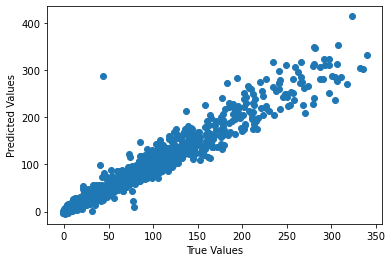

In [6]:
plt.scatter(predictions,y_test)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()